# Sociolla Website Data Visualization

In [2]:
%pip install seaborn

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import json


In [10]:
with open('/Users/trista/Documents/GitHub/reswaratrista/Seleksi-2023-Tugas-1/Data Scraping/data/sociolla.json', 'r') as json_file:
    json_data = json.load(json_file)

In [17]:
products = pd.DataFrame(json_data['products'])
just_arrived = pd.DataFrame(json_data['just_arrived'])
best_seller = pd.DataFrame(json_data['best_seller'])
brands = pd.DataFrame(json_data['brand_list'])
country = pd.DataFrame(json_data['brand_origins'])
brand_country = pd.DataFrame(json_data['brand_country'])

### Brand dengan jumlah produk yang tergolong 'Best Seller' atau 'Just Arrived'

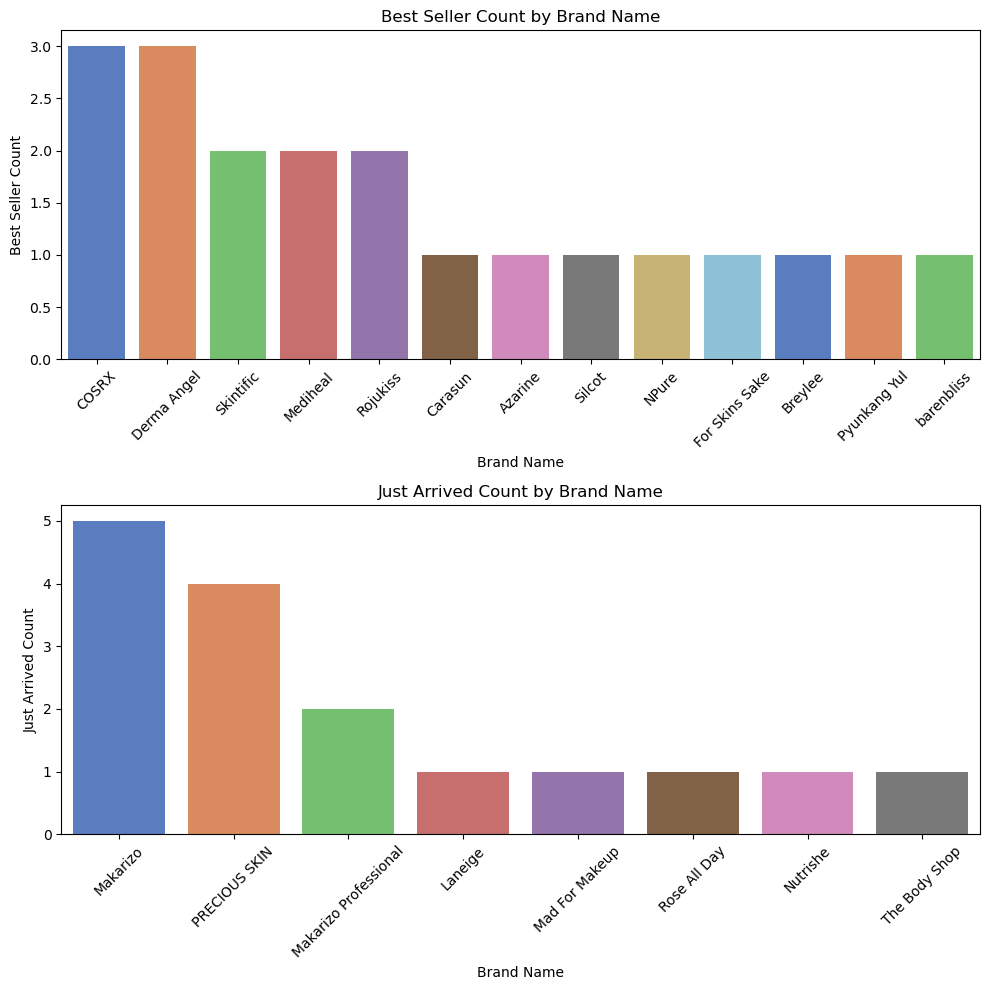

In [91]:
count_best_seller = best_seller['brand name'].value_counts()
count_just_arrived = just_arrived['brand name'].value_counts()

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

color_palette = sns.color_palette('muted', n_colors=len(count_best_seller))
sns.barplot(x=count_best_seller.index, y=count_best_seller.values, palette=color_palette, ax=ax[0])
ax[0].set_xlabel('Brand Name')
ax[0].set_ylabel('Best Seller Count')
ax[0].set_title('Best Seller Count by Brand Name')
ax[0].set_xticklabels(count_best_seller.index, rotation=45)

color_palette = sns.color_palette('muted', n_colors=len(count_just_arrived))
sns.barplot(x=count_just_arrived.index, y=count_just_arrived.values, palette=color_palette, ax=ax[1])
ax[1].set_xlabel('Brand Name')
ax[1].set_ylabel('Just Arrived Count')
ax[1].set_title('Just Arrived Count by Brand Name')
ax[1].set_xticklabels(count_just_arrived.index, rotation=45)

plt.tight_layout()
plt.show()


### Persebaran Harga Produk dan Diskon berdasarkan Kategori Produk

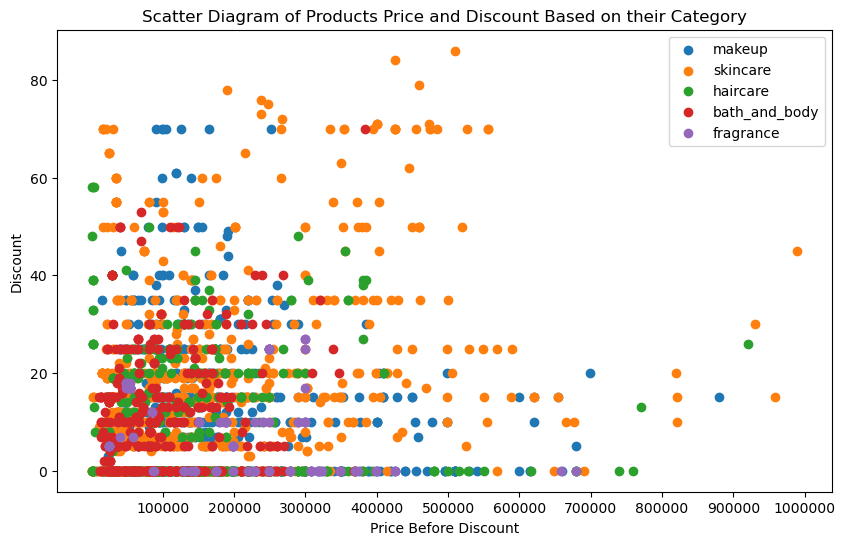

In [82]:
price_bfr = products['price_before_discount']
disc = products['discount']
category = products['category']

fig, ax = plt.subplots(figsize=(10,6))

# Iterate over unique categories and plot scatter points with different colors
for cat in category.unique():
    mask = category == cat
    ax.scatter(price_bfr[mask], disc[mask], label=cat)

ax.set(title="Scatter Diagram of Products Price and Discount Based on their Category",
       xlabel="Price Before Discount",
       ylabel="Discount")
ax.legend()

# Set custom x-axis tick locations and labels
xtick_locations = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]  # Adjust the values as needed
xtick_labels = [str(x) for x in xtick_locations]
plt.xticks(xtick_locations, xtick_labels)

plt.show()

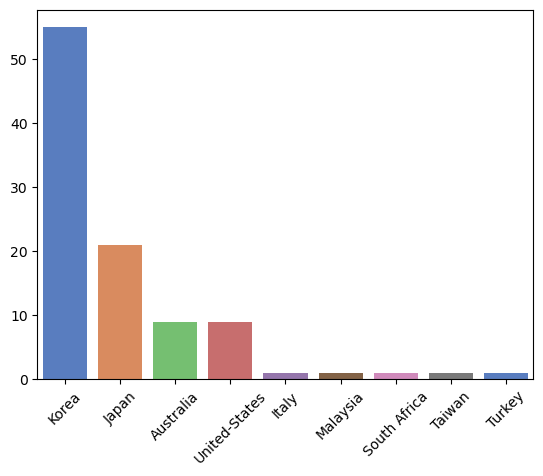

In [98]:
ctr = brand_country['country name'].value_counts()
  
palette_color = sns.color_palette('muted', n_colors=len(ctr))
sns.barplot(x=ctr.index, y=ctr.values, palette=color_palette)
sns.xlabel = 'brand name'
plt.ylabel = 'best seller count'
plt.title = 'Best Seller Count by Brand Name'
plt.xticks(rotation=45)
plt.show()

## Insights

1. Dapat dilakukan perbandingan brand yang `best seller` dan `just arrived` untuk mengetahui preferensi _customer_. Brand yang memiliki jumlah produk `best seller` terbanyak adalah CORSX dan Derma Angel. Sedangkan, Brand dengan jumlah produk `just arrived` terbanyak adalah Makarizo

2. Dapat dilihat persebaran harga dan diskon dari masing-masing produk dari tiap kategori. Terdapat kategori yang cenderung menjual produk-produknya dengan harga rendah dan minim diskon. Namun, terdapat kategori yang persebaran harga dan diskonnya merata. 

3. Dapat dilihat _brand_ asal negara mana yang menguasai pasar di Sociolla. Produk dengan _brand_ asal korea memiliki jumlah tertinggi. 